In [2]:
# coding=utf-8
import os
import math
import time
import joblib
import random
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import category_encoders as ce
from time import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from xgboost import *
from scipy.stats import normaltest, linregress
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.cluster import *
from sklearn.ensemble import *
from sklearn.datasets import load_digits, make_hastie_10_2, load_breast_cancer, load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric, type_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
import unicodedata
import warnings

# %matplotlib
# %matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 5000)

In [14]:
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 1.1. Divide the data into 80% training and 20% testing.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0, stratify=iris.target)
np.shape(X_train), np.shape(X_test)

((120, 4), (30, 4))

## 1.2. From the training set only take 5% of the data and train the supervised learning models (Logistic Regression, Decision Trees, Random Forest, and Naive Bayes) and test it on the test set created in the previous step.

In [38]:
class Foo:
    def __init__(self):
        iris = load_iris()
        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(iris.data, iris.target, test_size=0.2, random_state=0, stratify=iris.target)

    def training_model(self, clf, frac=0.05):
        l = int(len(self.X_train) * frac)
        x = self.X_train[:l, :]
        y = self.y_train[:l]
        clf.fit(x, y)
        pred = clf.predict(self.X_test)
        return pred

foo = Foo()
y_pred = foo.training_model(LogisticRegression(), frac=0.05)
print("LR:", accuracy_score(y_pred, foo.y_test))
y_pred = foo.training_model(DecisionTreeClassifier(), frac=0.05)
print("DT:", accuracy_score(y_pred, foo.y_test))
y_pred = foo.training_model(RandomForestClassifier(), frac=0.05)
print("RF:", accuracy_score(y_pred, foo.y_test))
y_pred = foo.training_model(GaussianNB(), frac=0.05)
print("NB:", accuracy_score(y_pred, foo.y_test))


LR: 0.6666666666666666
DT: 0.5333333333333333
RF: 0.5333333333333333
NB: 0.3333333333333333


## 1.3. Repeat the training again with now 10% of the data and keep on adding the 5% until you use the whole training set.

In [47]:
foo = Foo()
for i in range(20):
    frac=0.05*(i+1)
    print("test frac: %.2f"% frac)
    y_pred = foo.training_model(LogisticRegression(), frac=frac)
    print("LR: %.2f"% accuracy_score(y_pred, foo.y_test))
    y_pred = foo.training_model(DecisionTreeClassifier(), frac=frac)
    print("DT: %.2f"% accuracy_score(y_pred, foo.y_test))
    y_pred = foo.training_model(RandomForestClassifier(), frac=frac)
    print("RF: %.2f"% accuracy_score(y_pred, foo.y_test))
    y_pred = foo.training_model(GaussianNB(), frac=frac)
    print("NB: %.2f"% accuracy_score(y_pred, foo.y_test))
    print()

test frac: 0.05
LR: 0.67
DT: 0.63
RF: 0.53
NB: 0.33

test frac: 0.10
LR: 0.87
DT: 0.93
RF: 0.97
NB: 0.87

test frac: 0.15
LR: 0.87
DT: 0.93
RF: 0.97
NB: 0.87

test frac: 0.20
LR: 0.93
DT: 0.93
RF: 0.97
NB: 0.97

test frac: 0.25
LR: 0.93
DT: 0.93
RF: 0.97
NB: 0.90

test frac: 0.30
LR: 0.93
DT: 0.93
RF: 0.93
NB: 0.90

test frac: 0.35
LR: 0.87
DT: 0.93
RF: 0.93
NB: 0.93

test frac: 0.40
LR: 0.97
DT: 0.93
RF: 0.93
NB: 0.97

test frac: 0.45
LR: 0.97
DT: 0.93
RF: 0.93
NB: 0.97

test frac: 0.50
LR: 1.00
DT: 0.93
RF: 0.93
NB: 0.97

test frac: 0.55
LR: 0.97
DT: 0.93
RF: 0.93
NB: 0.97

test frac: 0.60
LR: 1.00
DT: 0.93
RF: 0.93
NB: 0.97

test frac: 0.65
LR: 1.00
DT: 0.93
RF: 0.93
NB: 0.97

test frac: 0.70
LR: 1.00
DT: 0.93
RF: 0.93
NB: 0.97

test frac: 0.75
LR: 1.00
DT: 0.97
RF: 0.93
NB: 0.97

test frac: 0.80
LR: 1.00
DT: 0.97
RF: 0.93
NB: 0.97

test frac: 0.85
LR: 1.00
DT: 0.97
RF: 0.93
NB: 0.97

test frac: 0.90
LR: 1.00
DT: 0.97
RF: 0.93
NB: 0.97

test frac: 0.95
LR: 1.00
DT: 0.97
RF: 0.93
NB:

## 1.4. In every training test on the 20% of the test set and report the accuracy and f1-score of the model.

In [53]:
class Foo:
    def __init__(self):
        iris = load_iris()
        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(iris.data, iris.target, test_size=0.2, random_state=0, stratify=iris.target)

    def training_model(self, clf, frac=0.05):
        l = int(len(self.X_train) * frac)
        x = self.X_train[:l, :]
        y = self.y_train[:l]
        clf.fit(x, y)
        pred = clf.predict(self.X_test)
        return pred
    
    def metrics(self, name, pred):
        print("%s: accuracy\t%.3f\tf1_score\t%.3f" % 
              (name, accuracy_score(self.y_test, pred), f1_score(self.y_test, pred, average="macro")))


foo = Foo()
for i in range(20):
    frac=0.05*(i+1)
    print("test frac: %.2f"% frac)
    y_pred = foo.training_model(LogisticRegression(), frac=frac)
    foo.metrics("LR", y_pred)
    y_pred = foo.training_model(DecisionTreeClassifier(), frac=frac)
    foo.metrics("DT", y_pred)
    y_pred = foo.training_model(RandomForestClassifier(), frac=frac)
    foo.metrics("RF", y_pred)
    y_pred = foo.training_model(GaussianNB(), frac=frac)
    foo.metrics("NB", y_pred)
    print()

test frac: 0.05
LR: accuracy	0.667	f1_score	0.556
DT: accuracy	0.633	f1_score	0.531
RF: accuracy	0.667	f1_score	0.556
NB: accuracy	0.333	f1_score	0.167

test frac: 0.10
LR: accuracy	0.867	f1_score	0.861
DT: accuracy	0.933	f1_score	0.933
RF: accuracy	0.967	f1_score	0.967
NB: accuracy	0.867	f1_score	0.865

test frac: 0.15
LR: accuracy	0.867	f1_score	0.861
DT: accuracy	0.933	f1_score	0.933
RF: accuracy	0.967	f1_score	0.967
NB: accuracy	0.867	f1_score	0.865

test frac: 0.20
LR: accuracy	0.933	f1_score	0.933
DT: accuracy	0.933	f1_score	0.933
RF: accuracy	0.967	f1_score	0.967
NB: accuracy	0.967	f1_score	0.967

test frac: 0.25
LR: accuracy	0.933	f1_score	0.933
DT: accuracy	0.933	f1_score	0.933
RF: accuracy	0.933	f1_score	0.933
NB: accuracy	0.900	f1_score	0.900

test frac: 0.30
LR: accuracy	0.933	f1_score	0.933
DT: accuracy	0.933	f1_score	0.933
RF: accuracy	0.933	f1_score	0.933
NB: accuracy	0.900	f1_score	0.900

test frac: 0.35
LR: accuracy	0.867	f1_score	0.867
DT: accuracy	0.933	f1_score	0.93

## 1.5. Plot the sample graph for accuracy and f1-score as provided below:

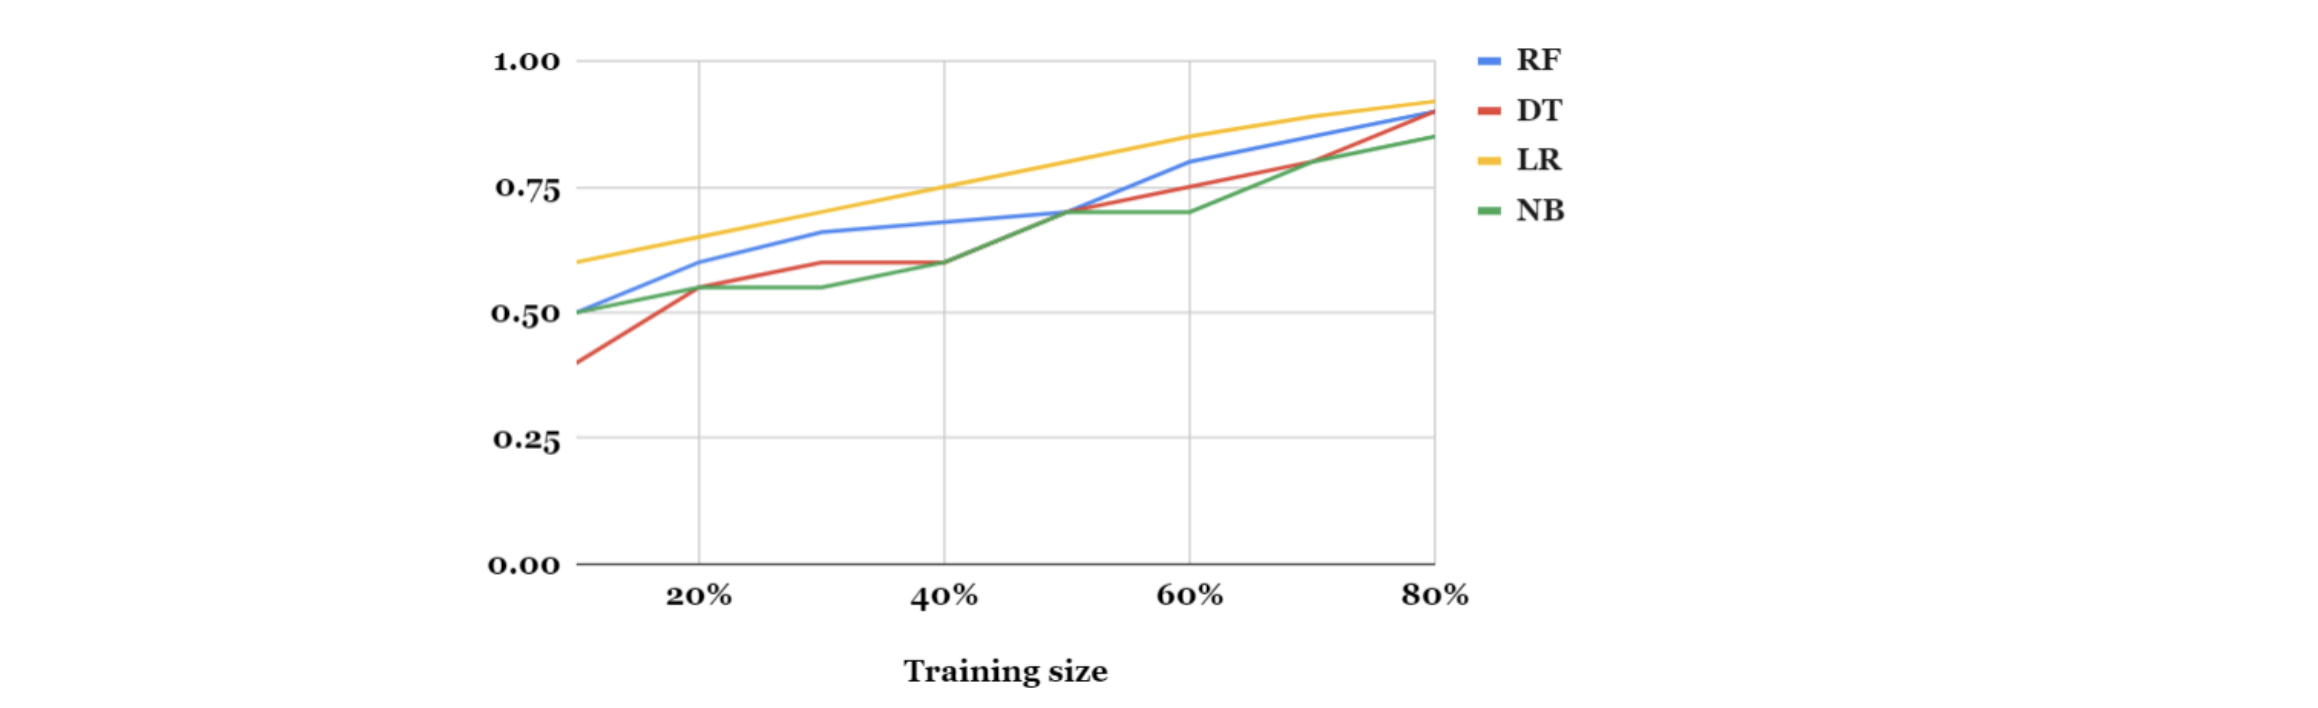

In [61]:
class Foo:
    def __init__(self):
        iris = load_iris()
        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(iris.data, iris.target, test_size=0.2, random_state=0, stratify=iris.target)

    def training_model(self, clf, name, frac):
        lst = []
        lst.append(frac)
        lst.append(name)
        l = int(len(self.X_train) * frac)
        x = self.X_train[:l, :]
        y = self.y_train[:l]
        clf.fit(x, y)
        pred = clf.predict(self.X_test)
        acc = accuracy_score(self.y_test, pred)
        f1 = f1_score(self.y_test, pred, average="macro")
        lst.append(acc)
        lst.append(f1)
        return lst


foo = Foo()
buf = []
for i in range(20):
    frac = 0.05 * (i + 1)
    print("test frac: %.2f" % frac)
    buf.append(foo.training_model(LogisticRegression(), "LR", frac=frac))
    buf.append(foo.training_model(DecisionTreeClassifier(), "DT", frac=frac))
    buf.append(foo.training_model(RandomForestClassifier(), "RF", frac=frac))
    buf.append(foo.training_model(GaussianNB(), "NB", frac=frac))

result = pd.DataFrame(buf)
result.columns = ["data_frac", "model", "accuracy", "f1"]
result

test frac: 0.05
test frac: 0.10
test frac: 0.15
test frac: 0.20
test frac: 0.25
test frac: 0.30
test frac: 0.35
test frac: 0.40
test frac: 0.45
test frac: 0.50
test frac: 0.55
test frac: 0.60
test frac: 0.65
test frac: 0.70
test frac: 0.75
test frac: 0.80
test frac: 0.85
test frac: 0.90
test frac: 0.95
test frac: 1.00


,data_frac,model,accuracy,f1
0,0.05,LR,0.666667,0.555556
1,0.05,DT,0.666667,0.555556
2,0.05,RF,0.533333,0.422222
3,0.05,NB,0.333333,0.166667
4,0.10,LR,0.866667,0.861111
5,0.10,DT,0.933333,0.932660
6,0.10,RF,0.966667,0.966583
7,0.10,NB,0.866667,0.865320
8,0.15,LR,0.866667,0.861111
9,0.15,DT,0.933333,0.932660


<AxesSubplot:xlabel='data_frac', ylabel='accuracy'>

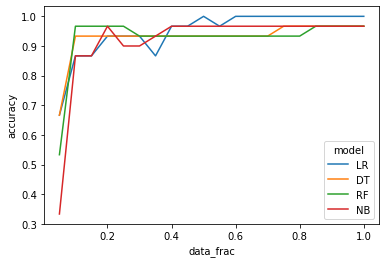

In [63]:
sns.lineplot(data=result, x="data_frac", y="accuracy", hue="model")

<AxesSubplot:xlabel='data_frac', ylabel='f1'>

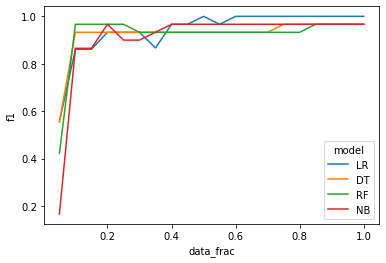

In [62]:
sns.lineplot(data=result, x="data_frac", y="f1", hue="model")

# 2.LR


In [77]:
x = np.array([-1.4 , -1.6 , -1.3 , 0.2 , 2.0 , -1.1 , 0.0 , 0.3 , -0.9 , -1.8])
r = np.array([6.9 , 7.8 , 8.0 , 5.8 , 1.9 , 7.3 , 5.8 , 5.8 , 8.2 , 9.6 ])

In [86]:
x = x.reshape(-1,1)
x

array([[-1.4],
       [-1.6],
       [-1.3],
       [ 0.2],
       [ 2. ],
       [-1.1],
       [ 0. ],
       [ 0.3],
       [-0.9],
       [-1.8]])

In [87]:
r

array([6.9, 7.8, 8. , 5.8, 1.9, 7.3, 5.8, 5.8, 8.2, 9.6])

In [100]:
reg = LinearRegression().fit(x, r)
w = reg.coef_
intercept = reg.intercept_

## 2.1 w0=5.77, w1=-1.68

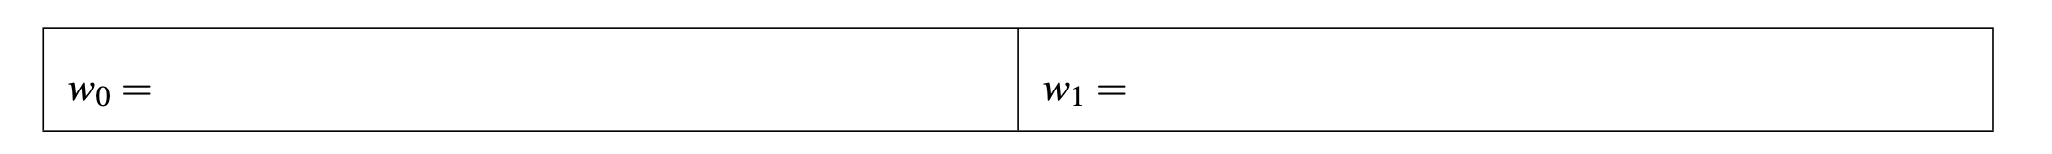



In [98]:
w

array([-1.68116175])

In [97]:
intercept

5.768549422336328

# 2.2. RMSE=0.65, MAE=0.54

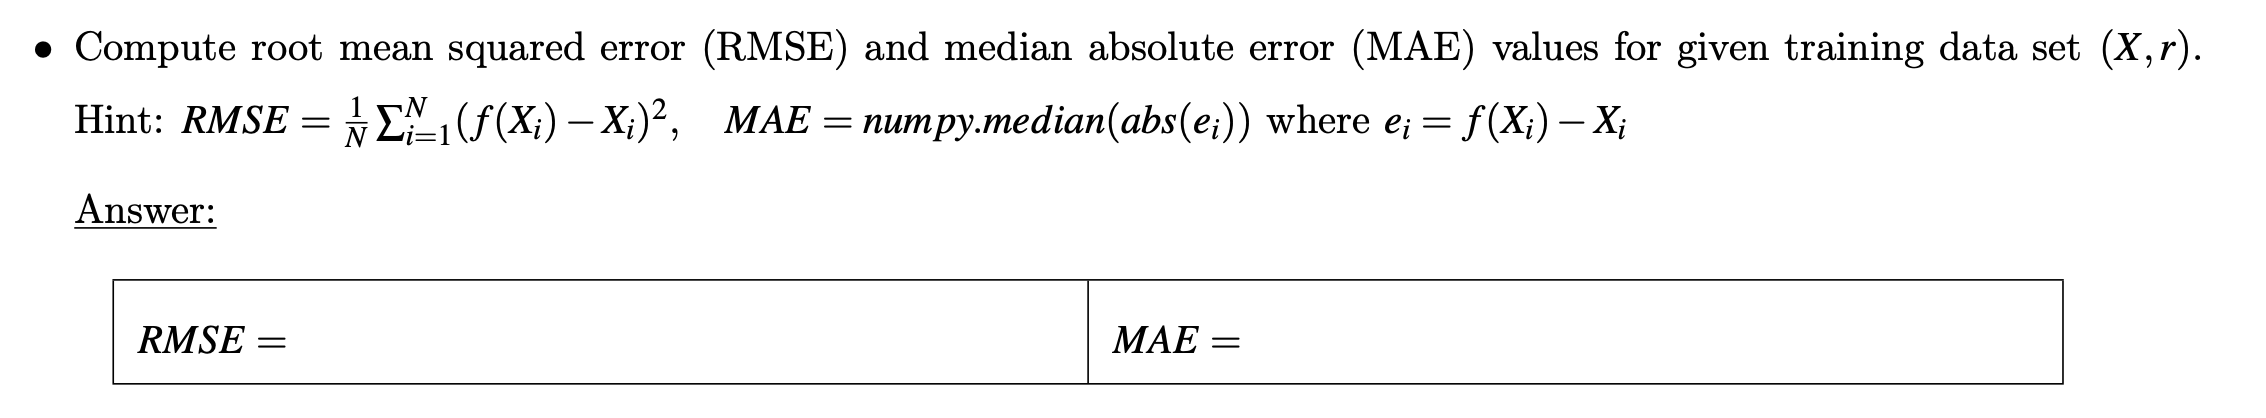

In [104]:
pred = reg.predict(x)
err = pred - r


In [107]:
rmse = (err**2).mean()**0.5
rmse

0.648223478278935

In [109]:
mae = abs(err).mean()
mae

0.5409274711168164

## 2.3. the predictions are : [6.77724647, 2.74245828, 5.9366656 , 3.9192715 , 8.62652439]

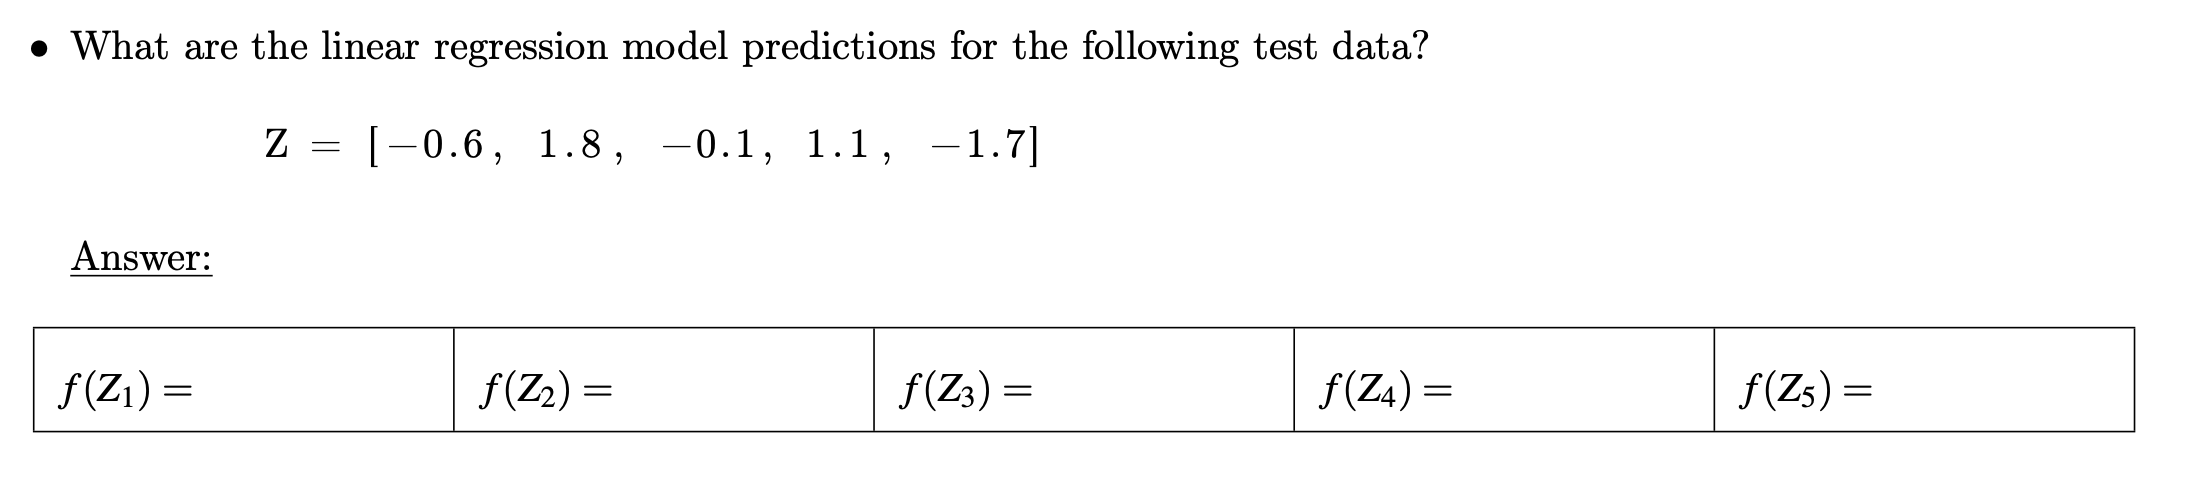

In [113]:
x_test =  np.array([ -0.6 , 1.8 , -0.1 , 1.1 , -1.7]).reshape(-1,1)
r_pred_test = reg.predict(x_test)
r_pred

array([6.77724647, 2.74245828, 5.9366656 , 3.9192715 , 8.62652439])

## 2.4. RMSE=1.72, MAE=1.45

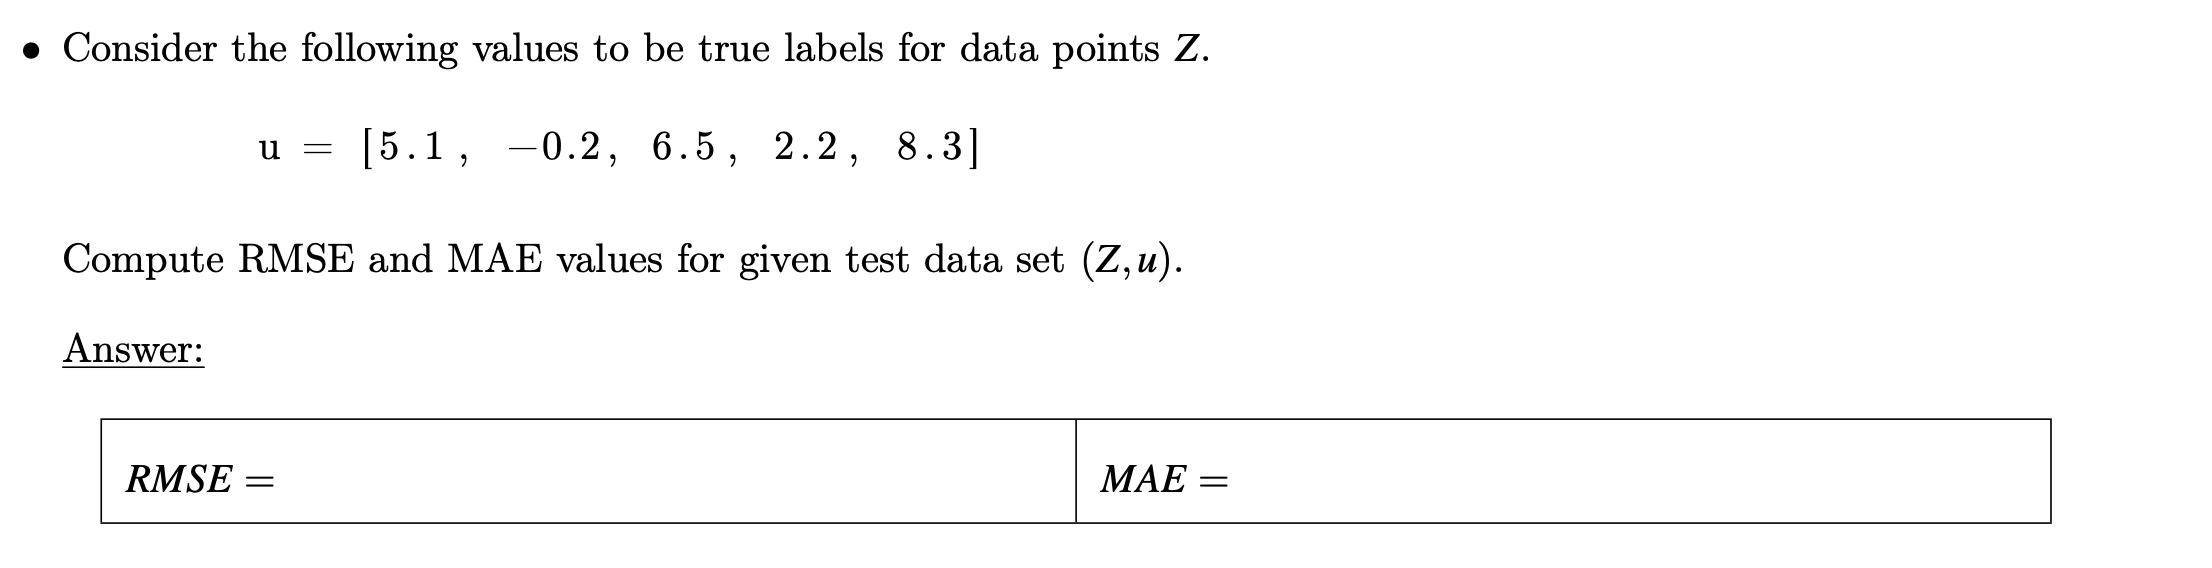

In [114]:
y_test=[ 5.1 , -0.2 , 6.5 , 2.2 , 8.3 ]

In [117]:
pred = reg.predict(x_test)
err = pred - y_test
rmse = (err**2).mean()**0.5
rmse

1.7234311575258021

In [118]:
mae = abs(err).mean()
mae

1.4457670089858785

# 3. p1=7, p2=10, p3=10

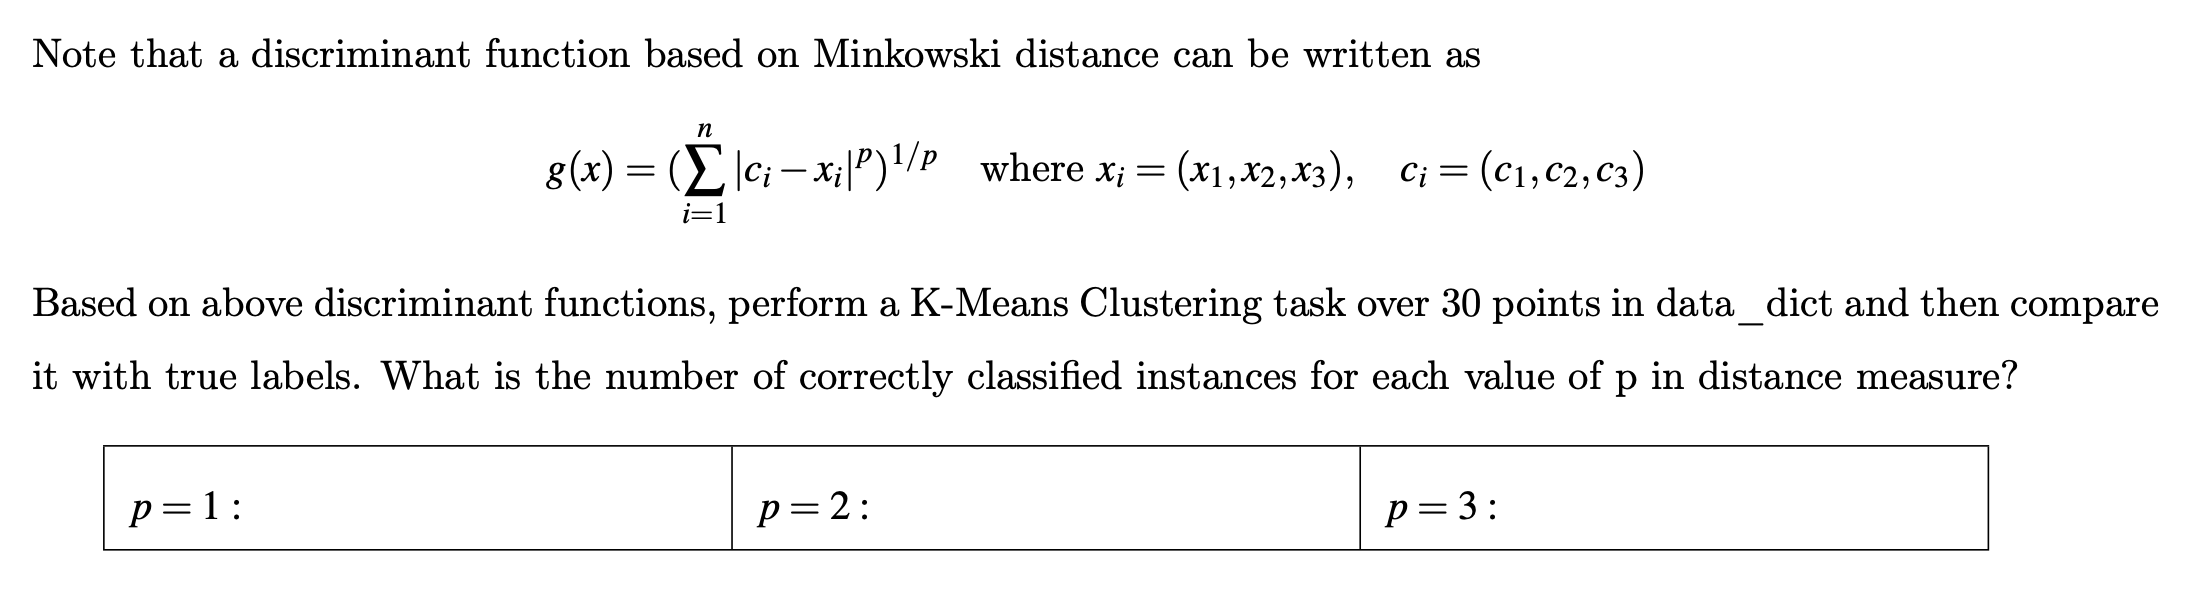

In [149]:
data_dict = {(2.0, 3.43, 4.37): 2, (2.49, 4.28, 4.83): 2, (2.58, 4.36, 4.48): 2, (2.66, 4.45, 5.95): 2,
             (2.82, 3.66, 4.51): 2, (3.03, 4.37, 5.07): 2, (3.27, 4.54, 4.57): 2, (3.41, 3.94, 5.35): 2,
             (3.53, 4.32, 5.41): 2, (3.53, 4.6, 6.8): 1, (3.61, 4.25, 5.21): 1, (3.61, 4.78, 5.47): 1,
             (3.72, 5.44, 5.88): 1, (3.87, 4.96, 4.52): 2, (4.13, 5.29, 6.6): 1, (4.25, 5.97, 5.48): 1,
             (4.61, 4.9, 5.11): 1, (4.73, 4.4, 6.78): 1, (4.97, 4.25, 5.0): 1, (4.98, 5.27, 6.79): 1,
             (5.08, 3.51, 4.69): 3, (5.15, 3.58, 4.2): 3, (5.67, 2.27, 4.65): 3, (5.67, 3.81, 5.75): 3,
             (5.94, 2.34, 4.12): 3, (6.06, 3.16, 4.36): 3, (6.09, 3.19, 4.02): 3, (6.43, 3.42, 4.18): 3,
             (6.56, 2.7, 4.03): 3, (6.79, 3.46, 4.81): 3}
df = pd.DataFrame([data_dict]).T
df['x1'], df['x2'], df['x3'] = df.index.str
df.rename(columns={0:'y'}, inplace = True)
df.reset_index(drop=True, inplace=True)
df

,y,x1,x2,x3
0,2,2.00,3.43,4.37
1,2,2.49,4.28,4.83
2,2,2.58,4.36,4.48
3,2,2.66,4.45,5.95
4,2,2.82,3.66,4.51
5,2,3.03,4.37,5.07
6,2,3.27,4.54,4.57
7,2,3.41,3.94,5.35
8,2,3.53,4.32,5.41
9,1,3.53,4.60,6.80


In [174]:
x = df[['x1','x2','x3']]
x

,x1,x2,x3
0,2.00,3.43,4.37
1,2.49,4.28,4.83
2,2.58,4.36,4.48
3,2.66,4.45,5.95
4,2.82,3.66,4.51
5,3.03,4.37,5.07
6,3.27,4.54,4.57
7,3.41,3.94,5.35
8,3.53,4.32,5.41
9,3.53,4.60,6.80


In [155]:
y = df['y']
y

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     1
10    1
11    1
12    1
13    2
14    1
15    1
16    1
17    1
18    1
19    1
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
Name: y, dtype: int64

In [190]:
from pyclustering.cluster.kmeans import kmeans

initial_centers = kmeans_plusplus_initializer(x, 3).initialize()
metric = distance_metric(type_metric.MINKOWSKI)
clf = kmeans(x.values, initial_centers, metric=metric)
clf.process()
clusters = clf.get_clusters()
final_centers = clf.get_centers()

TypeError: must be real number, not NoneType

In [178]:
clusters

[[9, 12, 14, 15, 16, 17, 19],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 18],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]

In [185]:
y[clusters[0]]

9     1
12    1
14    1
15    1
16    1
17    1
19    1
Name: y, dtype: int64

In [187]:
y[clusters[1]]

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
10    1
11    1
13    2
18    1
Name: y, dtype: int64

In [189]:
y[clusters[2]]

20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
Name: y, dtype: int64